In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

In [3]:
# Load data
data = pd.read_csv('sensor_data.csv')

In [4]:
data.count()

ID             6583
timestamp      6583
latitude       6583
longitude      6583
temperature    6345
humidity       6321
dtype: int64

In [5]:
#preparing data for temperature mode
temp_data = data.copy()
temp_data.dropna(subset=['temperature'],inplace = True)

In [6]:
temp_data.loc[temp_data['temperature']<0,'temperature'].count()

0

In [7]:
temp_data.interpolate(inplace=True)

In [8]:
temp_data.count()

ID             6345
timestamp      6345
latitude       6345
longitude      6345
temperature    6345
humidity       6345
dtype: int64

In [9]:
train_temp, test_temp = train_test_split(temp_data, test_size=0.2, random_state=42)

In [10]:
train_temp.count()

ID             5076
timestamp      5076
latitude       5076
longitude      5076
temperature    5076
humidity       5076
dtype: int64

In [11]:
test_temp.count()

ID             1269
timestamp      1269
latitude       1269
longitude      1269
temperature    1269
humidity       1269
dtype: int64

In [12]:
train_X_temp = train_temp[['latitude', 'longitude', 'humidity', 'timestamp']]
train_y_temp = train_temp['temperature']

In [13]:
test_X_temp = test_temp[['latitude', 'longitude', 'humidity', 'timestamp']]
test_y_temp = test_temp['temperature']

In [86]:
data_X_temp = temp_data[['latitude', 'longitude', 'humidity', 'timestamp']]
data_y_temp = temp_data['temperature']

In [87]:
data_X_temp.count()

latitude     6345
longitude    6345
humidity     6345
timestamp    6345
dtype: int64

In [14]:
# Define kernel functions
kernel_temp = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

In [15]:
model_temp = GaussianProcessRegressor(kernel=kernel_temp)
model_temp.fit(train_X_temp, train_y_temp)

/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

In [88]:
pred_y_temp = model_temp.predict(test_X_temp)

In [92]:
pred_y_temp.shape

(1269,)

In [18]:
# Evaluate model on test data
test_rmse_temp = ((test_y_temp - pred_y_temp)**2).mean()**0.5
print(test_rmse_temp)


0.8378323618098715


In [19]:
#preparing data for temperature mode
humid_data = data.copy()
humid_data.dropna(subset=['humidity'],inplace = True)

In [20]:
humid_mean = humid_data.loc[humid_data['humidity']>0,'humidity'].min()
print(humid_mean)
humid_data.loc[humid_data['humidity']<0,'humidity'] = humid_mean

1.781


In [21]:
humid_data.interpolate(inplace=True)

In [22]:
humid_data.count()

ID             6321
timestamp      6321
latitude       6321
longitude      6321
temperature    6321
humidity       6321
dtype: int64

In [23]:
train_humid, test_humid = train_test_split(humid_data, test_size=0.2, random_state=42)

In [24]:
train_humid.count()

ID             5056
timestamp      5056
latitude       5056
longitude      5056
temperature    5056
humidity       5056
dtype: int64

In [25]:
test_humid.count()

ID             1265
timestamp      1265
latitude       1265
longitude      1265
temperature    1265
humidity       1265
dtype: int64

In [26]:
train_X_humid = train_humid[['latitude', 'longitude', 'temperature', 'timestamp']]
train_y_humid = train_humid['humidity']

In [27]:
test_X_humid = test_humid[['latitude', 'longitude', 'temperature', 'timestamp']]
test_y_humid = test_humid['humidity']

In [28]:
# Define kernel functions
kernel_humid = ConstantKernel(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

#kernel_humid = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e5)) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-10, 1e+1))



In [29]:
model_humid = GaussianProcessRegressor(kernel=kernel_humid)
model_humid.fit(train_X_humid, train_y_humid)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

In [30]:
pred_y_humid = model_humid.predict(test_X_humid)

In [31]:
test_rmse_temp = ((test_y_humid - pred_y_humid)**2).mean()**0.5

In [32]:
print(test_rmse_temp)

3.749135424039154


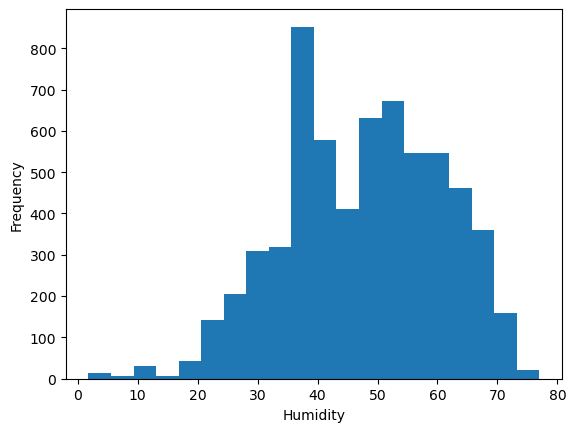

In [33]:
import matplotlib.pyplot as plt


# Plot a histogram of the humidity values
plt.hist(humid_data['humidity'], bins=20)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


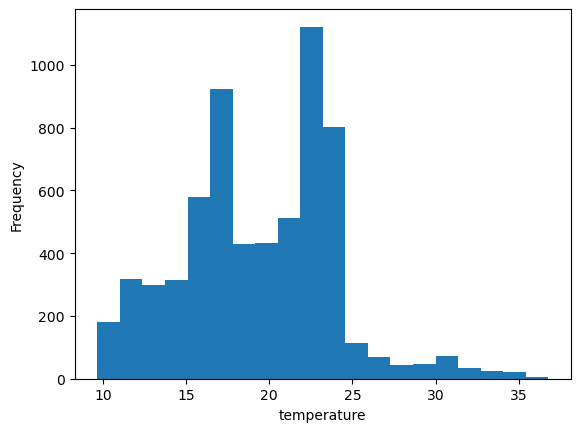

In [34]:
import matplotlib.pyplot as plt


# Plot a histogram of the humidity values
plt.hist(temp_data['temperature'], bins=20)
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.show()


In [61]:
# final prediction for submission
pred_data = data.copy()
pred_data = pred_data[pred_data['temperature'].isna() | pred_data['humidity'].isna()]

In [62]:
pred_data.count()

ID             500
timestamp      500
latitude       500
longitude      500
temperature    262
humidity       238
dtype: int64

In [64]:
pred_temp = pred_data[pred_data['temperature'].isna()]

In [65]:
pred_temp.count()

ID             238
timestamp      238
latitude       238
longitude      238
temperature      0
humidity       238
dtype: int64

In [67]:
pred_humid = pred_data[pred_data['humidity'].isna()]

In [68]:
pred_humid.count()

ID             262
timestamp      262
latitude       262
longitude      262
temperature    262
humidity         0
dtype: int64

In [69]:
pred_temp.drop(['temperature'], axis=1,inplace=True)
pred_humid.drop(['humidity'], axis=1,inplace=True)

/var/folders/8d/ftv5hsns5r3gsjsltnwk_ysr0000gn/T/ipykernel_1205/2738498298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_temp.drop(['temperature'], axis=1,inplace=True)
/var/folders/8d/ftv5hsns5r3gsjsltnwk_ysr0000gn/T/ipykernel_1205/2738498298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_humid.drop(['humidity'], axis=1,inplace=True)


In [70]:
pred_temp.count()

ID           238
timestamp    238
latitude     238
longitude    238
humidity     238
dtype: int64

In [71]:
pred_humid.count()

ID             262
timestamp      262
latitude       262
longitude      262
temperature    262
dtype: int64

In [72]:
pred_temp['prediction'] = model_temp.predict(pred_temp[['latitude', 'longitude', 'humidity', 'timestamp']])


/var/folders/8d/ftv5hsns5r3gsjsltnwk_ysr0000gn/T/ipykernel_1205/749807790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_temp['prediction'] = model_temp.predict(pred_temp[['latitude', 'longitude', 'humidity', 'timestamp']])


In [73]:
pred_temp.count()


ID            238
timestamp     238
latitude      238
longitude     238
humidity      238
prediction    238
dtype: int64

In [74]:
pred_humid['prediction'] = model_temp.predict(pred_humid[['latitude', 'longitude', 'temperature', 'timestamp']])



/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- temperature
Feature names seen at fit time, yet now missing:
- humidity

  warnings.warn(message, FutureWarning)
/var/folders/8d/ftv5hsns5r3gsjsltnwk_ysr0000gn/T/ipykernel_1205/3721073090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_humid['prediction'] = model_temp.predict(pred_humid[['latitude', 'longitude', 'temperature', 'timestamp']])


In [75]:
pred_humid.count()

ID             262
timestamp      262
latitude       262
longitude      262
temperature    262
prediction     262
dtype: int64

In [79]:
submission_df = pd.concat([pred_temp[['ID','prediction']],pred_humid[['ID','prediction']]],axis=0).sort_values('ID')

In [80]:
submission_df.count()

ID            500
prediction    500
dtype: int64

In [82]:
submission_df.to_csv('submission_file.csv',index=False)